# IMDb Dataset Analysis - Initial Data Exploration
This project analyzes the IMDb dataset containing 50,000 movie reviews. The goal is to explore the data, visualize sentiment distributions, clean the text data, and generate insights using NLP techniques.

## Import Libraries
We begin by loading the IMDb dataset from Kaggle. It contains two columns:
- `review`: The text of the movie review
- `sentiment`: Label indicating if the review is positive or negative

We also check for missing data and review a few entries.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from bs4 import BeautifulSoup

In [5]:
!pip install wordcloud

## Set visual style

In [11]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Load the Dataset

In [13]:
df = pd.read_csv('IMDB Dataset.csv')

## Inspect Dataset

In [15]:
print("Dataset Info:\n")
print(df.info())

print("\nFirst 5 Rows:\n")
print(df.head())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

First 5 Rows:

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


## Check for Missing Values

In [17]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

review       0
sentiment    0
dtype: int64


## Class Distribution

In [19]:
print("\nSentiment Distribution:\n")
print(df['sentiment'].value_counts())


Sentiment Distribution:

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


### Plot class distribution
This bar chart shows the distribution of positive and negative reviews. We observe that the dataset is perfectly balanced with 25,000 reviews in each class, which is ideal for training a classification model.

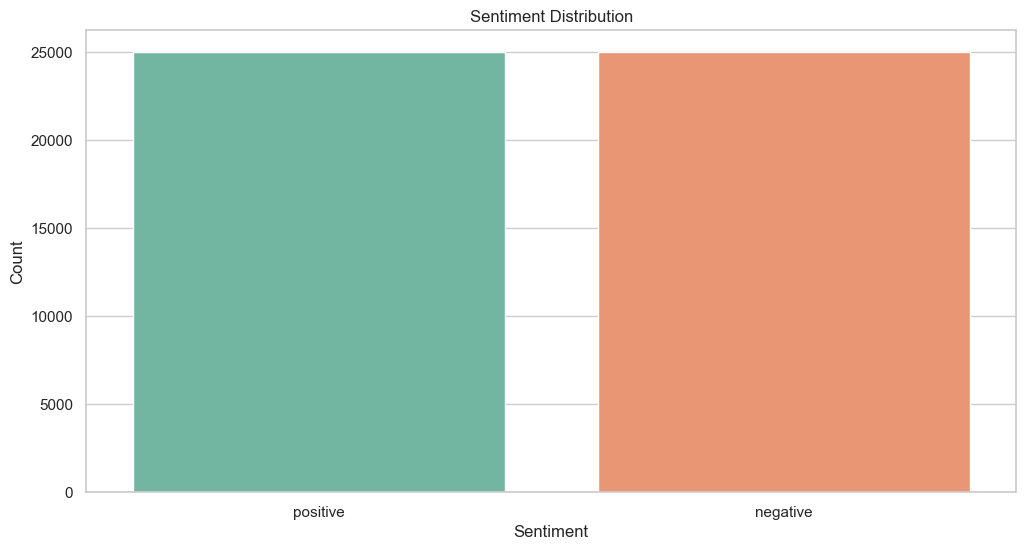

In [23]:
sns.countplot(x='sentiment', hue='sentiment', data=df, palette='Set2', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## Analyze Review Length
We calculate the number of characters in each review to understand the variation in review lengths. The average review length is around 1300 characters, but some are much longer. This insight will help later when deciding how to handle inputs for machine learning models.

In [25]:
df['review_length'] = df['review'].apply(len)
print("\nReview Length Statistics:\n")
print(df['review_length'].describe())


Review Length Statistics:

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64


### Plot review length distribution

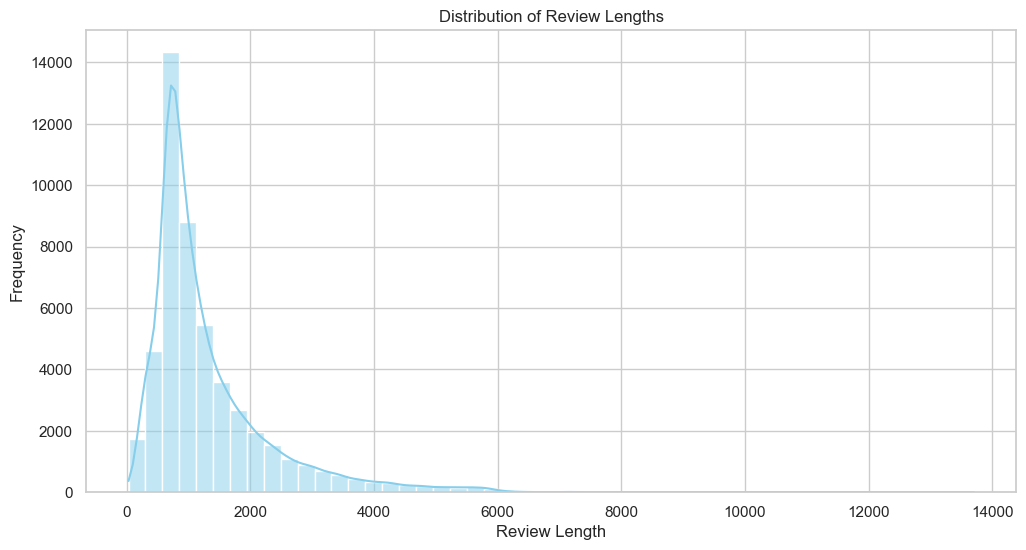

In [27]:
sns.histplot(df['review_length'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

## Preprocess Reviews (Basic Cleaning)
To prepare the text for modeling, we:
- Remove HTML tags
- Keep only alphabetic characters
- Convert text to lowercase
- Tokenize and rejoin words

This makes the text cleaner and more consistent for feature extraction.

In [36]:
def clean_review(text):
    text = BeautifulSoup(str(text), "html.parser").get_text()  # Ensure string input
    text = re.sub(r"[^a-zA-Z]", " ", text)                     # Keep only letters
    text = text.lower()                                        # Lowercase
    text = text.split()                                        # Tokenize
    return " ".join(text)

df['clean_review'] = df['review'].apply(clean_review)

## Generate Word Clouds
We generate word clouds for both positive and negative reviews. This helps us visually identify commonly used words in each sentiment category. For instance, positive reviews may frequently mention words like “great”, “love”, or “best”, while negative reviews might include “boring”, “worst”, or “waste”.

In [38]:
positive_text = " ".join(df[df['sentiment'] == 'positive']['clean_review'])
negative_text = " ".join(df[df['sentiment'] == 'negative']['clean_review'])

### Positive Word Cloud

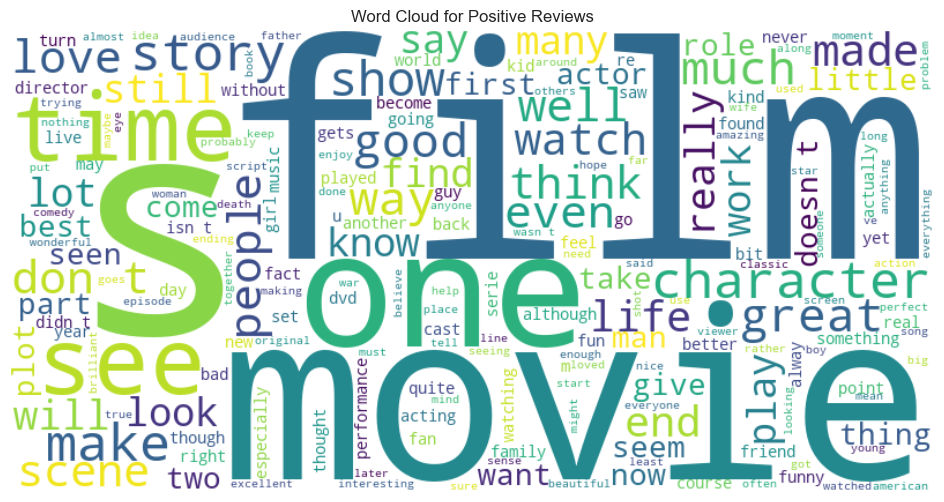

In [40]:
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

### Negative Word Cloud

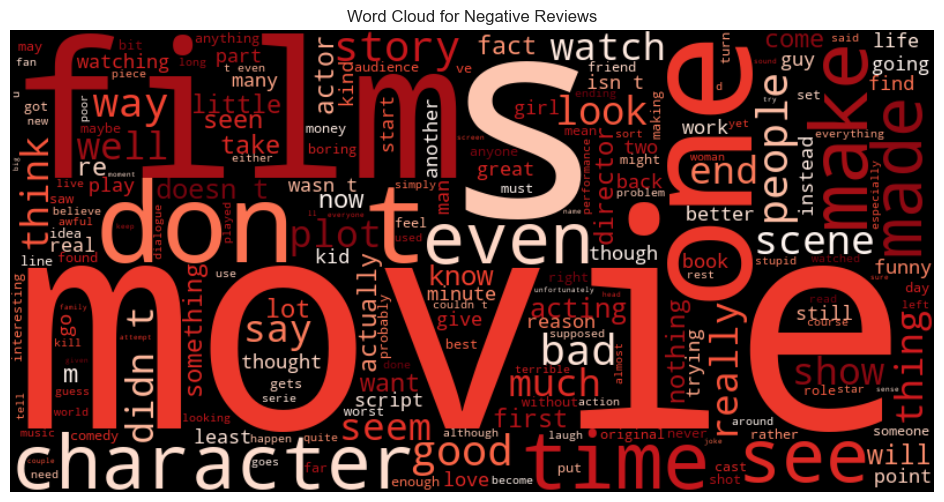

In [42]:
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()

## Violin Plot
Combine boxplot and kernel density estimation for review length comparison.

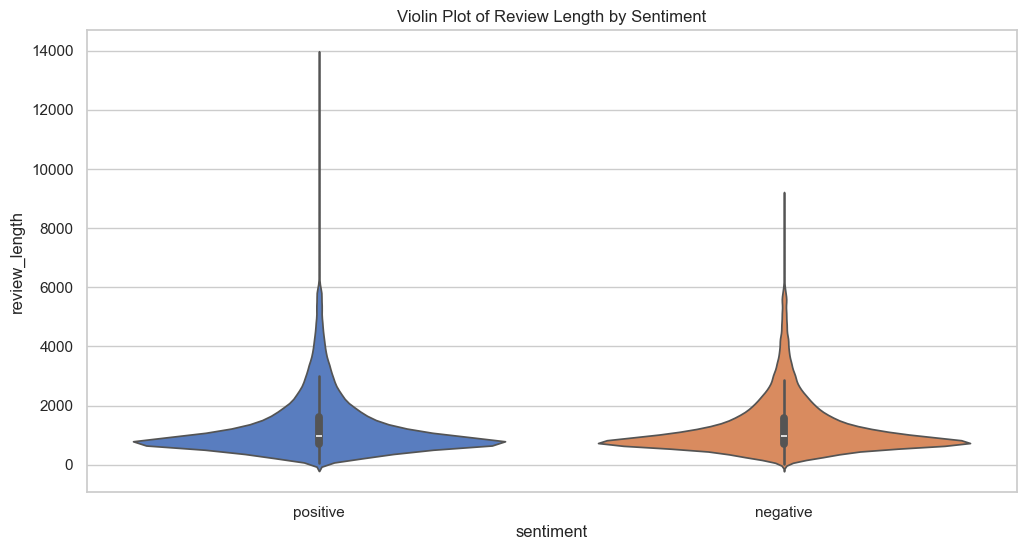

In [45]:
sns.violinplot(x='sentiment', y='review_length', hue='sentiment', data=df, palette='muted', legend=False)
plt.title("Violin Plot of Review Length by Sentiment")
plt.show()

## Heatmap (Correlation Matrix)
Show relationships between numerical features (e.g., length, sentiment encoded).

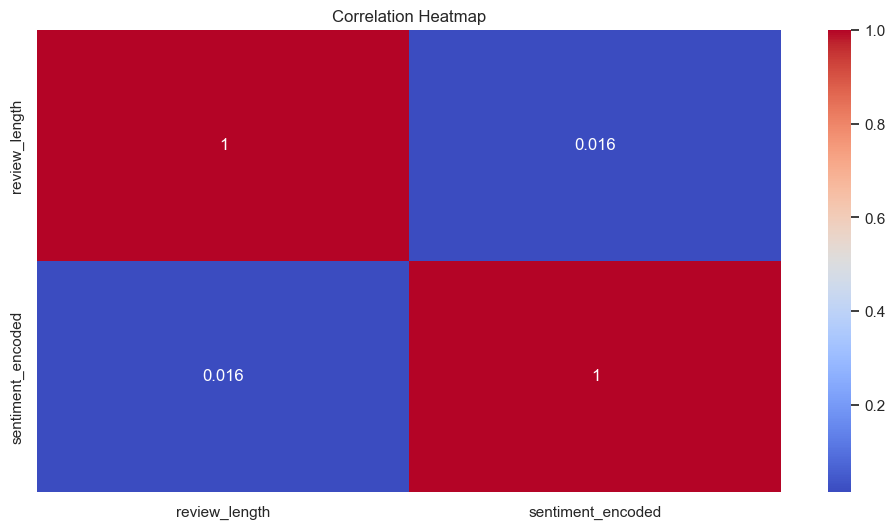

In [47]:
df['sentiment_encoded'] = df['sentiment'].map({'positive': 1, 'negative': 0})
sns.heatmap(df[['review_length', 'sentiment_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()